In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path


In [24]:
csv_path= Path("CombinedData/CombinedData.csv")

spotify_df= pd.read_csv(csv_path, encoding= 'utf-8', index_col= False)

spotify_df.head()

reduced_spotify_df = spotify_df[["track_name", "artist_name", "streams","country"]]

reduced_spotify_df.head()

,track_name,artist_name,streams,country
0,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,1640059,United States
1,STAY (with Justin Bieber),The Kid LAROI,1392423,United States
2,Way 2 Sexy (with Future & Young Thug),Drake,1311664,United States
3,Knife Talk (with 21 Savage ft. Project Pat),Drake,1266467,United States
4,Heat Waves,Glass Animals,1095757,United States


In [25]:
# Top 10 songs with the most streams
top_songs = reduced_spotify_df.groupby("track_name")["streams"].sum().sort_values(ascending=False).head(10)
print("Top 10 Songs by Streams:")
print(top_songs)

# Top 10 artists with the most streams
top_artists = reduced_spotify_df.groupby("artist_name")["streams"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Artists by Streams:")
print(top_artists)

# Streams by country
streams_by_country = reduced_spotify_df.groupby("country")["streams"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Countries by Streams:")
print(streams_by_country)

Top 10 Songs by Streams:
track_name
STAY (with Justin Bieber)            6381125
INDUSTRY BABY (feat. Jack Harlow)    5625410
Easy On Me                           4269062
Heat Waves                           3902689
My Universe                          3526204
Pepas                                3405539
Bad Habits                           3332639
Woman                                3215947
MONEY                                3203121
Shivers                              3086455
Name: streams, dtype: int64

Top 10 Artists by Streams:
artist_name
Lil Nas X         11485982
Doja Cat          10147991
Drake              9636455
Olivia Rodrigo     8528973
Ed Sheeran         7273005
Adele              7109627
Bad Bunny          6950433
The Kid LAROI      6946628
CKay               5609420
The Weeknd         5289834
Name: streams, dtype: int64

Top 10 Countries by Streams:
country
United States    70012958
Brazil           39667267
Mexico           33904166
Germany          22066914
Spain 

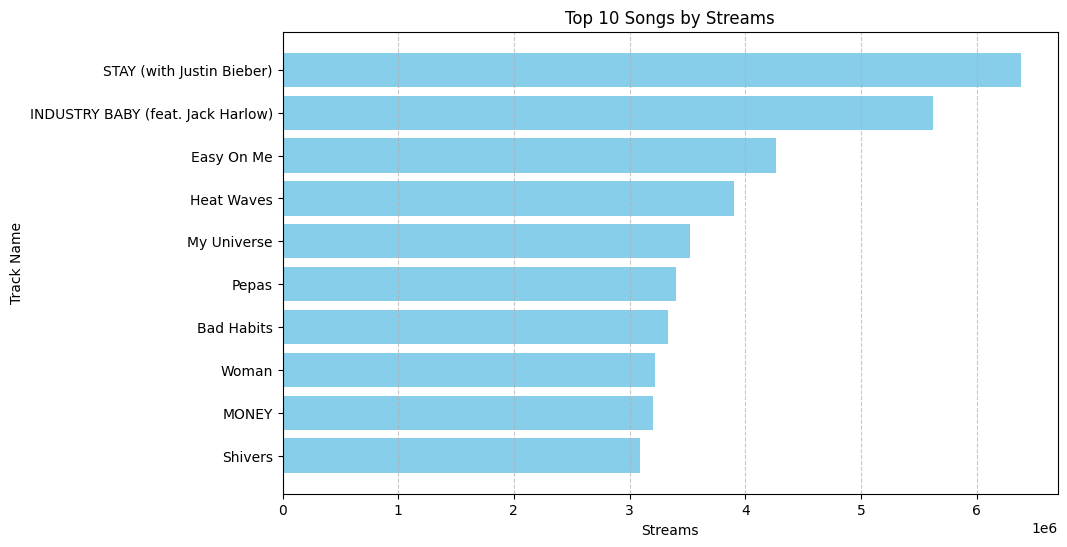

In [26]:
import matplotlib.pyplot as plt

# Top 10 Songs by Streams
plt.figure(figsize=(10, 6))
plt.barh(top_songs.index, top_songs.values, color='skyblue')
plt.xlabel("Streams")
plt.ylabel("Track Name")
plt.title("Top 10 Songs by Streams")
plt.gca().invert_yaxis()  # Invert y-axis to display the highest streams at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


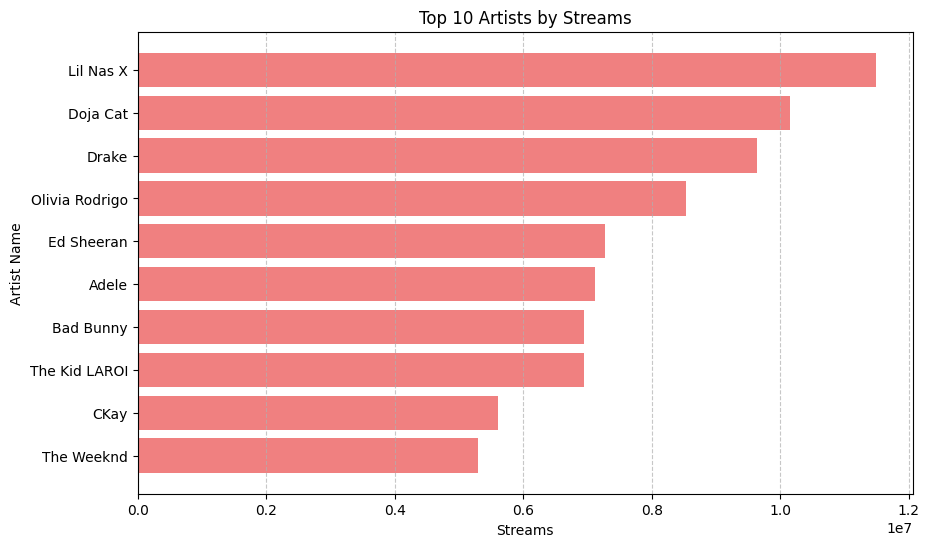

In [27]:
# Top 10 Artists by Streams
plt.figure(figsize=(10, 6))
plt.barh(top_artists.index, top_artists.values, color='lightcoral')
plt.xlabel("Streams")
plt.ylabel("Artist Name")
plt.title("Top 10 Artists by Streams")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


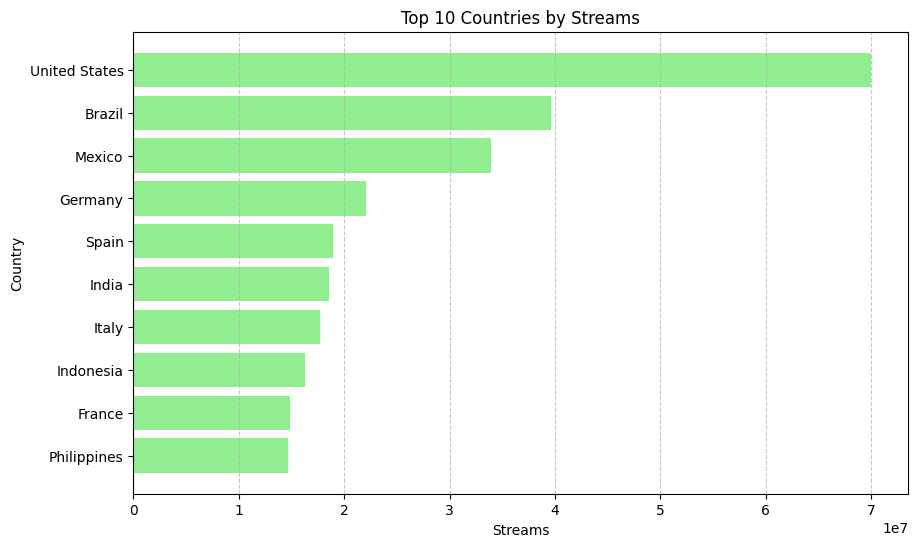

In [28]:
# Top 10 Countries by Streams
plt.figure(figsize=(10, 6))
plt.barh(streams_by_country.index, streams_by_country.values, color='lightgreen')
plt.xlabel("Streams")
plt.ylabel("Country")
plt.title("Top 10 Countries by Streams")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


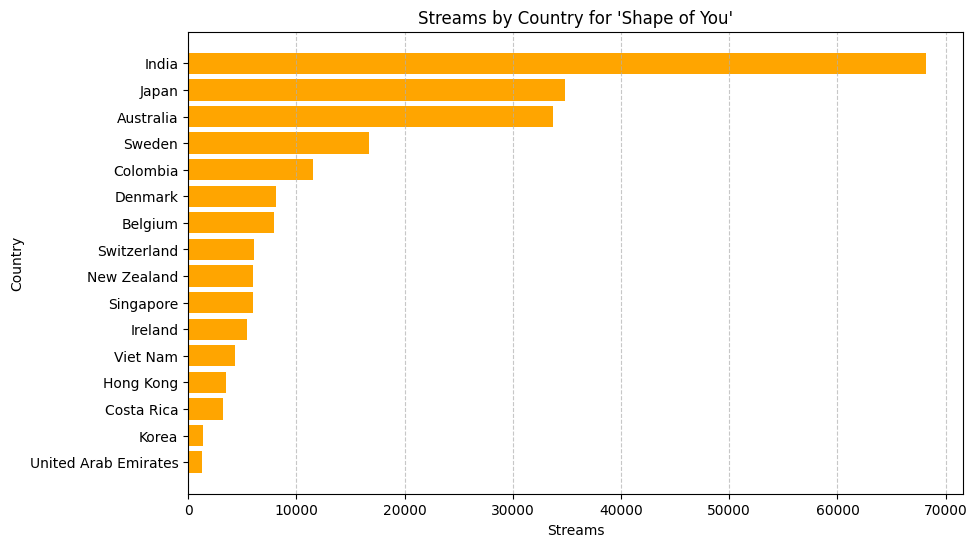

In [29]:
# Filter data for a specific song
song_name = "Shape of You"  # Replace with the song name you want to analyze
song_data = reduced_spotify_df[reduced_spotify_df["track_name"] == song_name]

# Streams by country for the selected song
song_streams_by_country = song_data.groupby("country")["streams"].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(song_streams_by_country.index, song_streams_by_country.values, color='orange')
plt.xlabel("Streams")
plt.ylabel("Country")
plt.title(f"Streams by Country for '{song_name}'")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


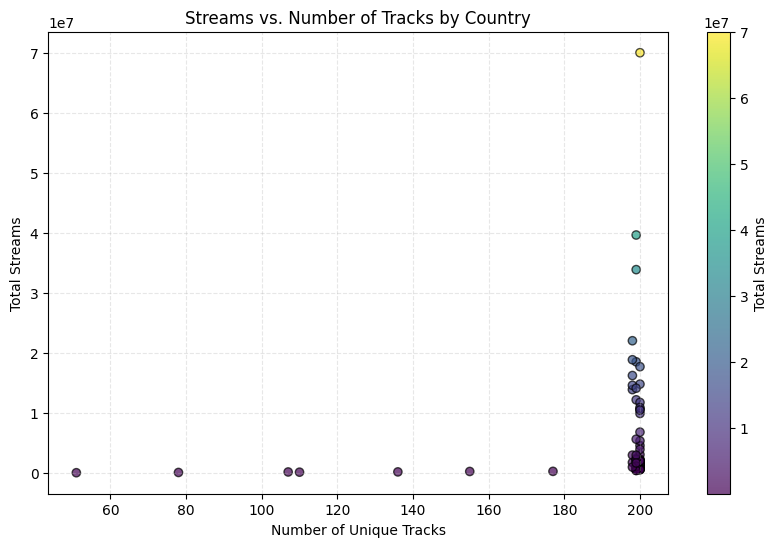

In [34]:
# Calculate the number of unique tracks and total streams for each country
country_analysis = reduced_spotify_df.groupby("country").agg(
    total_streams=("streams", "sum"),
    unique_tracks=("track_name", "nunique")
).reset_index()

# Scatter plot: Total Streams vs. Number of Unique Tracks by Country
plt.figure(figsize=(10, 6))
plt.scatter(
    country_analysis["unique_tracks"],
    country_analysis["total_streams"],
    alpha=0.7,
    c=country_analysis["total_streams"],
    cmap="viridis",
    edgecolors="black"
)
plt.colorbar(label="Total Streams")
plt.title("Streams vs. Number of Tracks by Country")
plt.xlabel("Number of Unique Tracks")
plt.ylabel("Total Streams")
plt.grid(alpha=0.3, linestyle='--')
plt.show()
